In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.integrate

In [2]:
from scipy.integrate import trapz
from scipy.integrate import simps

C:\Users\jimin\AppData\Local\Temp\ipykernel_10992\2815233169.py:7: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  result_t = trapz(y, x, dx=0.01)
C:\Users\jimin\AppData\Local\Temp\ipykernel_10992\2815233169.py:12: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  result_s = simps(y, x, dx = 0.01)


10.049382716049383
The error with Traprzoidal integral: 0.004938271604938293
10.0
The error with Simpson's integral: 0.0


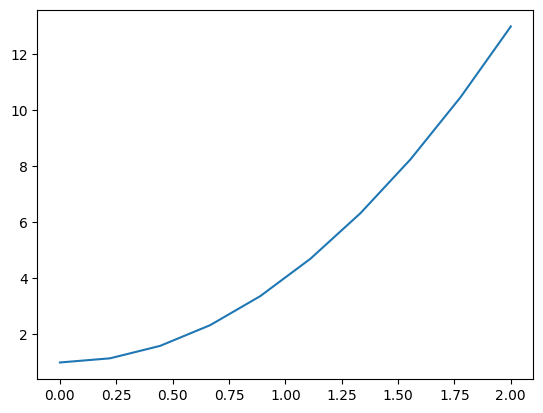

In [8]:
#f(x) = 3x^2 + 1: (0.2)
x = np.linspace(0,2,10)
y = 3*x**2 + 1

plt.plot(x,y)
true_value = 10.0
result_t = trapz(y, x, dx=0.01)
print(result_t)
err_t = np.abs(true_value - result_t) / true_value
print("The error with Traprzoidal integral:",err_t)

result_s = simps(y, x, dx = 0.01)
print(result_s)
err_s = np.abs(true_value - result_s) / true_value
print("The error with Simpson's integral:",err_s)

In [11]:
def my_f(x):
    return 3*x**2 + 1

def my_trapz(my_f, a, b, n):
    x = np.linspace(a,b,n+1)
    y = my_f(x)
    h = float((b-a)/n)
    value = h/2.0 * (y[0] + 2.0*np.sum(y[1:n]) + y[n])
    return value

result = my_trapz(my_f, 0, 2, 200)
print(result)

10.000100000000002


In [13]:
from scipy.integrate import quad

In [14]:
def integrand(x):
    value = 3.0*x**2 + 1
    return value

value, err = quad(integrand, 0, 2)
print(value)

10.000000000000002


In [16]:
def integrand(x):
    value = np.exp(-x)*np.sin(3*x)
    return value

value, err = quad(integrand, 0, 2.*np.pi) #0부터 2파이까지 적분하겠단 소리임.
print(value)

0.29943976718048754


In [18]:
def integrand(x,a,b):
    value = a*x**2 + b
    return value

a = 3
b = 1

I = quad(integrand, 0, 2, args=(a,b))
print(I)

(10.000000000000002, 1.1102230246251568e-13)


In [19]:
def integrand(t, n, x): #t에 대한 적분임, n과 x는 argument일뿐
    return np.exp(-x*t)/t**n

n = 1
x = 2

I = quad(integrand, 1, np.inf, args=(n,x)) #1에서 무한대까지 적분을 하겠단 소리임 
print(I)

(0.04890051070805328, 3.8165623275563357e-10)


In [22]:
def inte2(t, n, x): 
    value = np.exp(-x*t)/t**n
    return value

def inte1(x, n): #x가 변수, n은 argument
    return quad(inte2, 1.0, np.inf, args=(n,x))[0] #첫번째 값만 쓰겟다!!

n = 3 #고정됨

I = quad(inte1, 0.0, np.inf, args=(n))
print(I)

(0.33333333325010883, 2.8604069920115143e-09)


In [24]:
def inte2(x, y): 
    return x*y

def inte1(y): 
    return quad(inte2, 0.0, 1.0-2.0*y, args=(y))[0]

I = quad(inte1, 0.0, 0.5)
print(I)

#이거 알고 있기

(0.010416666666666668, 1.1564823173178715e-16)


In [27]:
from scipy.integrate import nquad

def f(x,y):
    return x*y

def bounds_y():
    return [0,0.5]

def bounds_x(y):
    return [0, 1-2*y]

nquad(f, [bounds_x, bounds_y])

(0.010416666666666668, 4.101620128472366e-16)

In [33]:
def integrand(z):
    omega_m = 0.26
    omega_lambda = 0.74
    omega_k = 8e-5
    E_z = (1+z)**3*omega_m+(1+z)**2*omega_k+omega_lambda
    return 1./(1+z)/np.sqrt(E_z)

H0 = 71 #km/s/Mpc
h0 = H0*1e5/3.084e24
t0 = 1./h0*quad(integrand, 0, np.inf)[0]
print(t0) #in second
print(t0/(60.*60.*24.*365.*1e9))

4.356553841986115e+17
13.814541609545012
